In [ ]:
#Importanto bibliotecas
import requests
from bs4 import BeautifulSoup
import pandas as pd
!pip install nltk
import nltk
#sentence breaker
nltk.download('punkt')
#speech tagging
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Crawl um site para extrair informação

# Função que analisa o site e extrai informações desejadas
def crawl_website():
    # Enviando solicitação
    response = requests.get('https://en.wikipedia.org/wiki/GPT-3')
    # Parse no HTML
    soup = BeautifulSoup(response.text, 'html.parser')
    # Find the main content div
    content = soup.find('div', {'id': 'mw-content-text'})
    # Extrair conteúdo
    text = content.get_text()
    return text

# Função de contagem de ocorrências "GPT-3" and "artificial intelligence"
def count_words(text):
    # Convertendo para caixa baixa
    text = text.lower()
    # Contando "GPT-3"
    count_gpt3 = text.count('gpt-3')
    # Contando "artificial intelligence"
    count_ai = text.count('artificial intelligence')
    return count_gpt3, count_ai

# Salvando dados em CSV
def save_data(count_gpt3, count_ai):
    # Criando um dicionário com as palavras e suas ocorrências
    data = {'Palavra': ['GPT-3', 'Artificial Intelligence'], 'Ocorrências': [count_gpt3, count_ai]}
    # Convertendo Dic para dataframe
    df = pd.DataFrame.from_dict(data)
    # Salvando dataframe em arquivo externo CSV
    df.to_csv('descomplica_2.csv', index=False)

def visualize_data(count_gpt3, count_ai):
    # Criando um gráfico
    plt.bar(['GPT-3', 'Artificial Intelligence'], [count_gpt3, count_ai])
    plt.xlabel('Palavra')
    plt.ylabel('Ocorrências')
    plt.title('Número de ocorrências')
    plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


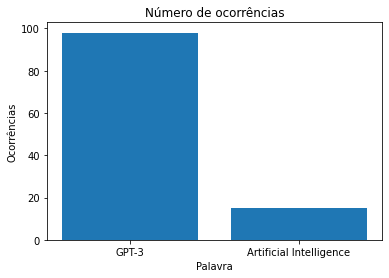

In [ ]:
# Função principal e chamada de outras funções
def main():
    # Crawl
    text = crawl_website()
    # Contagem
    count_gpt3, count_ai = count_words(text)
    # Salvando dados
    save_data(count_gpt3, count_ai)
    visualize_data(count_gpt3, count_ai)
    save_data(count_gpt3, count_ai)

if __name__ == '__main__':
    main()

In [ ]:
import requests
import logging

# Configuração do logger
logging.basicConfig(
    filename="user_interactions.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

def log_and_print(message, level="info"):
    """
    Função para logar e imprimir mensagens.
    """
    if level == "info":
        logging.info(message)
    elif level == "error":
        logging.error(message)
    elif level == "warning":
        logging.warning(message)
    print(message)

def fetch_weather_data():
    """
    Obtém dados meteorológicos de uma API pública.
    """
    log_and_print("Usuário solicitou dados meteorológicos.")
    try:
        latitude = input("Digite a latitude (ex: -23.55 para São Paulo): ")
        longitude = input("Digite a longitude (ex: -46.63 para São Paulo): ")
        log_and_print(f"Dados inseridos: latitude={latitude}, longitude={longitude}.")

        url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true"
        log_and_print(f"Realizando requisição para a URL: {url}.")

        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        log_and_print(f"Dados meteorológicos obtidos com sucesso: {data}.")
        return data
    except requests.exceptions.RequestException as e:
        log_and_print(f"Erro ao acessar dados meteorológicos: {e}", level="error")
        return {"error": "Erro ao obter dados meteorológicos"}

def fetch_crypto_data():
    """
    Obtém dados de criptomoedas de uma API pública.
    """
    log_and_print("Usuário solicitou dados de criptomoedas.")
    try:
        url = "https://api.coingecko.com/api/v3/coins/markets"
        params = {
            "vs_currency": "usd",
            "order": "market_cap_desc",
            "per_page": 5,
            "page": 1,
            "sparkline": "false"
        }
        log_and_print(f"Realizando requisição para a URL: {url} com parâmetros {params}.")

        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        log_and_print(f"Dados de criptomoedas obtidos com sucesso: {data}.")
        return data
    except requests.exceptions.RequestException as e:
        log_and_print(f"Erro ao acessar dados de criptomoedas: {e}", level="error")
        return {"error": "Erro ao obter dados de criptomoedas"}

def simulate_failure():
    """
    Simula um erro para fins de logging.
    """
    log_and_print("Usuário solicitou uma simulação de falha.", level="warning")
    try:
        raise ValueError("Simulação de falha intencional para demonstração de logs.")
    except ValueError as e:
        log_and_print(f"Erro simulado: {e}", level="error")

def main():
    """
    Sistema principal que interage com o usuário.
    """
    log_and_print("Sistema iniciado.")
    while True:
        log_and_print("Exibindo menu de opções para o usuário.")
        print("\nEscolha uma opção:")
        print("1. Consultar dados meteorológicos")
        print("2. Consultar dados de criptomoedas")
        print("3. Simular falha")
        print("4. Sair")

        choice = input("Digite o número da sua escolha: ")
        log_and_print(f"Usuário escolheu a opção: {choice}.")
        if choice == "1":
            fetch_weather_data()
        elif choice == "2":
            fetch_crypto_data()
        elif choice == "3":
            simulate_failure()
        elif choice == "4":
            log_and_print("Usuário encerrou o sistema.")
            print("Sistema encerrado. Obrigado!")
            break
        else:
            log_and_print(f"Opção inválida fornecida pelo usuário: {choice}", level="warning")
            print("Opção inválida. Tente novamente.")

# Executar o sistema
if __name__ == "__main__":
    main()




Sistema iniciado.
Exibindo menu de opções para o usuário.

Escolha uma opção:
1. Consultar dados meteorológicos
2. Consultar dados de criptomoedas
3. Simular falha
4. Sair
Digite o número da sua escolha: 1
Usuário escolheu a opção: 1.
Usuário solicitou dados meteorológicos.
Digite a latitude (ex: -23.55 para São Paulo): -23
Digite a longitude (ex: -46.63 para São Paulo): -23
Dados inseridos: latitude=-23, longitude=-23.
Realizando requisição para a URL: https://api.open-meteo.com/v1/forecast?latitude=-23&longitude=-23&current_weather=true.
Dados meteorológicos obtidos com sucesso: {'latitude': -23.0, 'longitude': -23.0, 'generationtime_ms': 0.04494190216064453, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 0.0, 'current_weather_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature': '°C', 'windspeed': 'km/h', 'winddirection': '°', 'is_day': '', 'weathercode': 'wmo code'}, 'current_weather': {'time': '2024-11-26T00:45', 'interval': 90

FileNotFoundError: Cannot find file: user_interactions.log

In [ ]:
import requests
import logging
import os
from google.colab import files

# Configuração do logger
LOG_FILENAME = "user_interactions.log"
logging.basicConfig(
    filename=LOG_FILENAME,
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

def log_and_print(message, level="info"):
    """
    Função para logar e imprimir mensagens.
    """
    if level == "info":
        logging.info(message)
    elif level == "error":
        logging.error(message)
    elif level == "warning":
        logging.warning(message)
    print(message)

def fetch_weather_data():
    """
    Obtém dados meteorológicos de uma API pública.
    """
    log_and_print("Usuário solicitou dados meteorológicos.")
    try:
        latitude = input("Digite a latitude (ex: -23.55 para São Paulo): ")
        longitude = input("Digite a longitude (ex: -46.63 para São Paulo): ")
        url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true"

        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        log_and_print(f"Dados meteorológicos obtidos com sucesso: {data}")
        return data
    except requests.exceptions.RequestException as e:
        log_and_print(f"Erro ao acessar dados meteorológicos: {e}", level="error")
        return {"error": "Erro ao obter dados meteorológicos"}

def fetch_crypto_data():
    """
    Obtém dados de criptomoedas de uma API pública.
    """
    log_and_print("Usuário solicitou dados de criptomoedas.")
    try:
        url = "https://api.coingecko.com/api/v3/coins/markets"
        params = {
            "vs_currency": "usd",
            "order": "market_cap_desc",
            "per_page": 5,
            "page": 1,
            "sparkline": "false"
        }

        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        log_and_print(f"Dados de criptomoedas obtidos com sucesso: {data}")
        return data
    except requests.exceptions.RequestException as e:
        log_and_print(f"Erro ao acessar dados de criptomoedas: {e}", level="error")
        return {"error": "Erro ao obter dados de criptomoedas"}

def simulate_failure():
    """
    Simula um erro para fins de logging.
    """
    log_and_print("Usuário solicitou uma simulação de falha.", level="warning")
    try:
        raise ValueError("Simulação de falha intencional para demonstração de logs.")
    except ValueError as e:
        log_and_print(f"Erro simulado: {e}", level="error")

def download_logs():
    """
    Verifica se o arquivo de log existe e permite o download.
    """
    if os.path.exists(LOG_FILENAME):
        log_and_print("Arquivo de log encontrado. Disponibilizando para download.")
        files.download(LOG_FILENAME)
    else:
        log_and_print("Arquivo de log não encontrado. Criando arquivo vazio.")
        with open(LOG_FILENAME, "w") as f:
            f.write("Nenhum log registrado.\n")
        files.download(LOG_FILENAME)

def main():
    """
    Sistema principal que interage com o usuário.
    """
    log_and_print("Sistema iniciado.")
    while True:
        log_and_print("Exibindo menu de opções para o usuário.")
        print("\nEscolha uma opção:")
        print("1. Consultar dados meteorológicos")
        print("2. Consultar dados de criptomoedas")
        print("3. Simular falha")
        print("4. Baixar logs")
        print("5. Sair")

        choice = input("Digite o número da sua escolha: ")
        if choice == "1":
            fetch_weather_data()
        elif choice == "2":
            fetch_crypto_data()
        elif choice == "3":
            simulate_failure()
        elif choice == "4":
            download_logs()
        elif choice == "5":
            log_and_print("Usuário encerrou o sistema.")
            print("Sistema encerrado. Obrigado!")
            break
        else:
            log_and_print(f"Opção inválida fornecida pelo usuário: {choice}", level="warning")
            print("Opção inválida. Tente novamente.")

# Executar o sistema
if __name__ == "__main__":
    main()


Sistema iniciado.
Exibindo menu de opções para o usuário.

Escolha uma opção:
1. Consultar dados meteorológicos
2. Consultar dados de criptomoedas
3. Simular falha
4. Baixar logs
5. Sair


In [ ]:
!pip install mysql-connector-python

import mysql.connector

def conectar_banco():
  return mysql.connector.connect(
      host="162.241.203.96:3306",
      user="descomplica_22",
      password="descomplica",
      database="descomplica_biblioteca"
  )


def consultar_livros_disponiveis():
  conexao = conectar_banco()
  cursor = conexao.cursor()
  cursor.execute("SELECT * FROM livros WHERE disponivel = 1")
  livros = cursor.fetchall()
  for livro in livros:
    print(livro)
  cursor.close()
  conexao.close()











